<a href="https://colab.research.google.com/github/DevLeoo/pandas-introduction-airbnb/blob/main/Introdu%C3%A7%C3%A3o_ao_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://bioinfo.imd.ufrn.br/static_newsletter/transcricaoemdia_old/NovEvo_site.jpg">

# **Pandas, uma breve introdução.**

por [Leonardo Cândido](https://www.linkedin.com/in/leonardo-teixeira-c%C3%A2ndido-286065191/).

# **Excelente!**

> Bom te ver por aqui!

Neste ***notebook*** daremos os primeiros passos práticos para o aprendizado da biblioteca Pandas. Você verá como importar a biblioteca, como criar *dataframes* do zero, como ler planilhas (csv), como *manipular* os dados de um dataframe, **plotar gráficos** e mais! 

Posteriormente, analisaremos os dados do **Airbnb** referentes à cidade de **Viena**, a capital da Áustria!

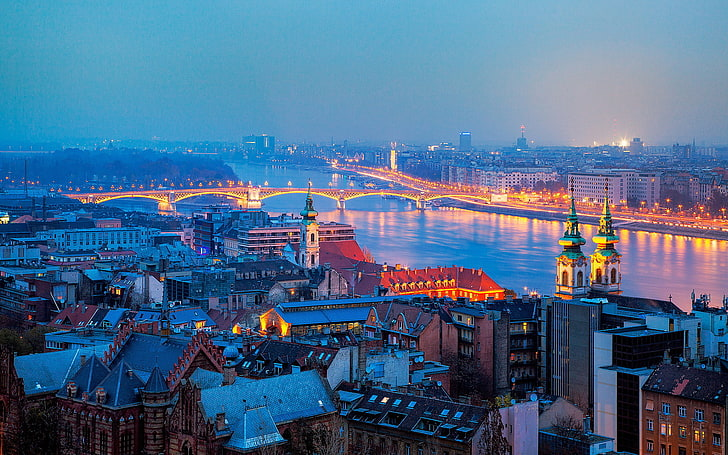

## Tabela de conteúdos

Neste *notebook* daremos uma noção introdutória ao Pandas.
**Você vai aprender**:
* Como importar a biblioteca
* Maneiras de se criar um DataFrame
* Como ler um arquivo .csv
* Noções básicas de manipulação de um DataFrame
* Noções estatísticas
* Gráficos com *matplotlib*

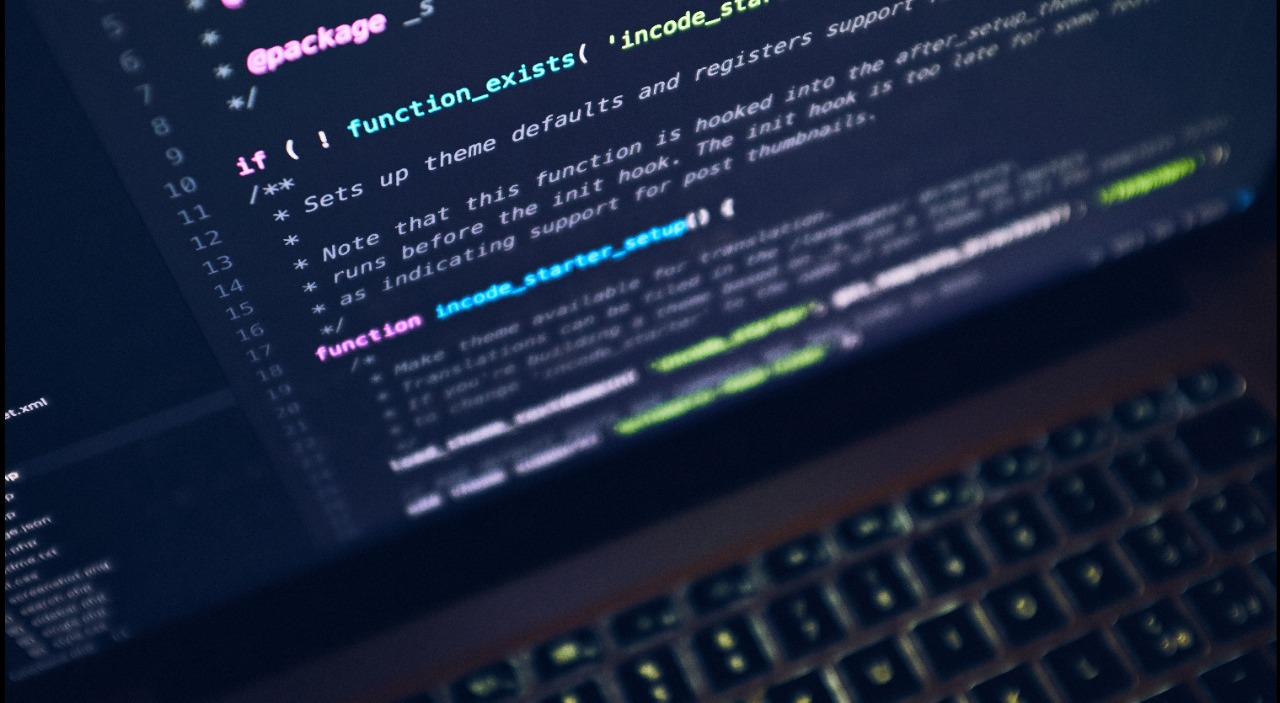

# **Análise dos dados**

### ***Chega de enrolação. Mão na massa!***

In [ ]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# aqui estamos importando o pandas e o matplotlib.pyplot. O Pandas recebeu o 'alias'
# ("apelido") de pd e o matplotlib.pyplot de plt, sendo assim eles serão
# chamados no restante do código através desse "apelido"

### **Criando um DataFrame**

Podemos criar um DataFrame de **diversas maneiras**, partindo de outros tipos de dados do python, como as **listas**, **dicionários** ou **tuplas**.

In [ ]:
# Criar um Dataframe a partir de um dicionário

alunos  = {
    "nome": ["João", "Pedro", "José", "Maria"],
    "idade": [15, 14, 16, 15],
    "notas": [8.0, 7.5, 8.2, 9]
}

df = pd.DataFrame(alunos)

# Já temos nosso DataFrame em memória e podemos manipulá-lo através da variável 'df'
# Exibindo
display(df)

,nome,idade,notas
0,João,15,8.0
1,Pedro,14,7.5
2,José,16,8.2
3,Maria,15,9.0


In [ ]:
# Criar um Dataframe a partir de uma lista

sales = [[10, "Roberta", "Caderno", 30.0], [11, "Vinicius", "Lápis", 1.50], 
            [12, "Rodrigo", "Mochila", 150.50], [13, "Carol", "Bloco de notas", 25.00]]
  
df_sales = pd.DataFrame(sales, columns=["id", "nome", "produto", "preco"])
df_sales = df_sales.set_index("id")
display(df_sales)

,nome,produto,preco
id,,,
10,Roberta,Caderno,30.0
11,Vinicius,Lápis,1.5
12,Rodrigo,Mochila,150.5
13,Carol,Bloco de notas,25.0


---
> No código acima nós criamos o *DataFrame* a partir de uma lista, note que tivemos que passar o parametro **'columns'** para termos uma descrição do que significa cada valor. Também utilizamos o `id` de cada cliente como index (identificador) de cada linha.


## **Manipulando o DataFrame**


### **Como acessar as colunas (Series)?**
As Series podem ser visualizadas de algumas maneiras diferentes, por exemplo:

In [ ]:
df_sales.nome

id
10     Roberta
11    Vinicius
12     Rodrigo
13       Carol
Name: nome, dtype: object

In [ ]:
df_sales["produto"]

id
10           Caderno
11             Lápis
12           Mochila
13    Bloco de notas
Name: produto, dtype: object

In [ ]:
df_sales.get("preco")

id
10     30.0
11      1.5
12    150.5
13     25.0
Name: preco, dtype: float64

### **Filtrando Dados**

Há muitas maneiras de se executar *queries* (consultas) nos dataframes, veremos algumas a seguir.


In [ ]:
# antes de seguirmos, vamos visualizar os tipos de estrutura de dados: DataFrame e Series

display(type(df_sales))

# coluna nome
display(type(df_sales.nome))

# cada tipo possui um conjunto imenso de métodos de manipulação!

pandas.core.frame.DataFrame

pandas.core.series.Series

In [ ]:
# usando .loc
# df.loc[<linhas>, <colunas>]
# aqui estamos indicando que queremos pegar todas as linhas da coluna 'nome'
df_sales.loc[:,"nome"]

id
10     Roberta
11    Vinicius
12     Rodrigo
13       Carol
Name: nome, dtype: object

In [ ]:
# usando .iloc
# aqui estamos indicando que queremos a célula da primeira linha e primeira coluna do dataframe
df_sales.iloc[[0],[0]]

,nome
id,
10,Roberta


In [ ]:
# o mesmo resultado poderia ser obtido da seguinte maneira, retornando diretamente o valor da célula
df_sales.iat[0, 0]

'Roberta'

In [ ]:
# Filtrando produtos com custo igual ou superior a 30
# retorna uma Series contendo booleanos (true ou false) para os valores filtrados
df_sales["preco"] >= 30

id
10     True
11    False
12     True
13    False
Name: preco, dtype: bool

In [ ]:
# Filtrando produtos com custo igual ou superior a 30
# retorna um dataframe com todos os dados que se enquadram no filtro
df_sales.loc[df_sales["preco"] >= 30]


# PS: df_sales[df_sales["preco"] >= 30] tem o mesmo resultado

,nome,produto,preco
id,,,
10,Roberta,Caderno,30.0
12,Rodrigo,Mochila,150.5


## **Criando DataFrame a partir de um csv**


Para tal, utilizaremos uma **planilha simplificada** referente aos dados gerados pelo **Airbnb**. Analisaremos a cidade de Viena, Áustria.


---
É possivel encontrar outras cidades [aqui](http://insideairbnb.com/get-the-data/).

---

> **Antes** de prosseguirmos é necessário ter em mente o que *significa cada variável* do nosso *dataset*.



**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


In [ ]:
FILE_PATH = (
    "http://data.insideairbnb.com/austria/vienna/"
    "vienna/2022-06-07/visualisations/listings.csv"
)

df_vienna = pd.read_csv(FILE_PATH, index_col=['id'])

# o método head() exibe, por padrão, as 5 primeiras linhas
df_vienna.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
561418072780605554,Double im Suburb Hostel,4109732,Thomas,NaN,Penzing,48.21533,16.17153,Private room,20,1,9,2022-06-05,2.55,3,313,9,NaN
39864901,Cozy home as close to nature as to Vienna 1,37411375,Michael,NaN,Liesing,48.12474,16.27311,Private room,27,2,20,2022-04-26,0.65,3,249,13,NaN
349560,Citycenter+Terrace + free garage,1771038,Agnes,NaN,Landstra§e,48.20916,16.39557,Entire home/apt,95,7,32,2022-04-09,0.31,2,290,8,NaN
349676,Close to metro U4,1771038,Agnes,NaN,Margareten,48.18825,16.34780,Entire home/apt,89,31,41,2022-05-01,0.39,2,322,1,NaN
15883,b&b near Old Danube river,62142,Eva,NaN,Donaustadt,48.24262,16.42767,Hotel room,110,1,14,2021-10-07,0.16,4,361,3,NaN


In [ ]:
# tail() é semelhante ao método head(), porém exibe as 5 últimas linhas
# vamos configurar para exibir as últimas 3
df_vienna.tail(3)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
641327350158781490,Comfort-Studio in Wien,462418224,Peter,NaN,Favoriten,48.172450,16.365195,Entire home/apt,47,2,0,NaN,NaN,1,172,0,NaN
641384899015852877,Exquisite Home w/ Free Parking - suitable for ...,404652017,Ali,NaN,Floridsdorf,48.286813,16.427255,Entire home/apt,321,1,0,NaN,NaN,139,176,0,NaN
641571037971221575,Schöne ruhige Wohnung,269289166,Michael,NaN,Hernals,48.217116,16.340489,Entire home/apt,51,1,0,NaN,NaN,1,338,0,NaN


> Agora que temos os dados da planilha atribuidos à variável *df_vienna* podemos realizar uma série de manipulações.

---
**Veremos algumas coisas que podem serem feitas.**


In [ ]:
# tipos de dados das colunas
df_vienna.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [ ]:
# Dimensões do dataframe
print(f"Linhas: {df_vienna.shape[0]}")
print(f"Colunas: {df_vienna.shape[1]}")

Linhas: 11274
Colunas: 17


In [ ]:
# Informações gerais
df_vienna.info()

# Vemos a contagem de dados não nulos e seus tipos, por coluna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11274 entries, 561418072780605554 to 641571037971221575
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            11262 non-null  object 
 1   host_id                         11274 non-null  int64  
 2   host_name                       11271 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   11274 non-null  object 
 5   latitude                        11274 non-null  float64
 6   longitude                       11274 non-null  float64
 7   room_type                       11274 non-null  object 
 8   price                           11274 non-null  int64  
 9   minimum_nights                  11274 non-null  int64  
 10  number_of_reviews               11274 non-null  int64  
 11  last_review                     9245 non-null   object 
 12  re

In [ ]:
# Quais são os nomes e qual é a quantidade de cada bairro em ordem decrescente?
df_vienna.neighbourhood.value_counts().sort_values(ascending=False)

Leopoldstadt            1203
Landstra§e              1030
Rudolfsheim-Fnfhaus     792
Favoriten                726
Neubau                   667
Margareten               660
Alsergrund               646
Innere Stadt             568
Ottakring                566
Mariahilf                552
Meidling                 481
Brigittenau              439
Wieden                   434
Josefstadt               414
Donaustadt               348
Whring                  319
Penzing                  316
Hernals                  299
Dbling                  237
Simmering                181
Floridsdorf              147
Hietzing                 143
Liesing                  106
Name: neighbourhood, dtype: int64

### **Noções estatísticas**

> Aqui utilizaremos a coluna ***price*** para analisarmos alguns dados.



In [ ]:
df_vienna["price"].describe()

# como resultado obtemos uma série de dados estísticos como a média, desvio padrão
# percentil 25 entre outros

count    11274.000000
mean        92.449796
std        195.254831
min          0.000000
25%         44.000000
50%         69.000000
75%        100.000000
max       9270.000000
Name: price, dtype: float64

In [ ]:
# é possivel acessar as métricas individualmente
display(df_vienna["price"].mean())
display(df_vienna["price"].count())


92.44979599077523

11274

### **Plotando um gráfico**

Apenas para fins didáticos, veremos como construir um **gráfico de pizza** utilizando as informações exibidas anteriormente.



> Utilizaremos a biblioteca ***matplotlib***.



In [ ]:
# Preparando as informações para serem exibidas no pie chart
room_types = dict(df_vienna.room_type.value_counts())

labels = room_types.keys()
sizes = room_types.values()
explode = (0.1, 0.1, 0.1)

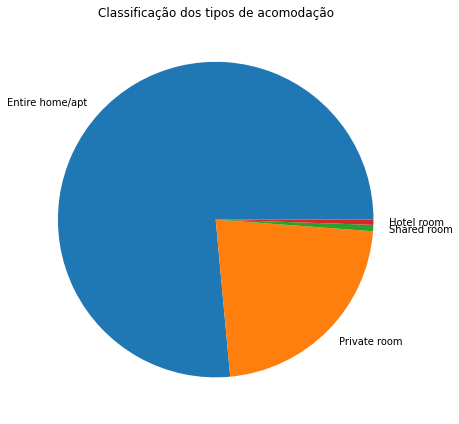

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.pie(sizes, labels=labels)
ax.set_title("Classificação dos tipos de acomodação")

plt.tight_layout()

## **Por fim...**

Parabéns por ter chegado até o fim! 

Se esse foi seu primeiro contato com a poderosa biblioteca Pandas, provavelmente você deve estar muito confuso, pois acabou de ser bombardeado por diversas informações, mas fique tranquilo! Sugiro que pratique mais e mais, afinal

> "Nós nos transformamos naquilo que praticamos com frequência. A perfeição, portanto, não é um ato isolado. É um hábito" - Aristóteles.

Aqui você aprendeu alguns conceitos que serão muito úteis na sua jornada!

Novamente, **parabéns** pelo esforço e **muito obrigado** pelo seu tempo e atenção! Até mais 👋